* Variable - Definition

* ID - Unique ID
* Gender - Gender of the customer
* Ever_Married - Marital status of the customer
* Age - Age of the customer
* Graduated - Is the customer a graduate?
* Profession - Profession of the customer
* Work_Experience - Work Experience in years
* Spending_Score - Spending score of the customer
* Family_Size - Number of family members for the customer (including the customer)
* Var_1 - Anonymised Category for the customer
* Segmentation - (target) Customer Segment of the customer

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data_train = pd.read_csv('/content/Train.csv')
data_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [10]:
data_train.shape

(8068, 11)

In [11]:
data_train.dtypes

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [12]:
data_train.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [13]:
data_train.duplicated().sum()

0

In [14]:
data_train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

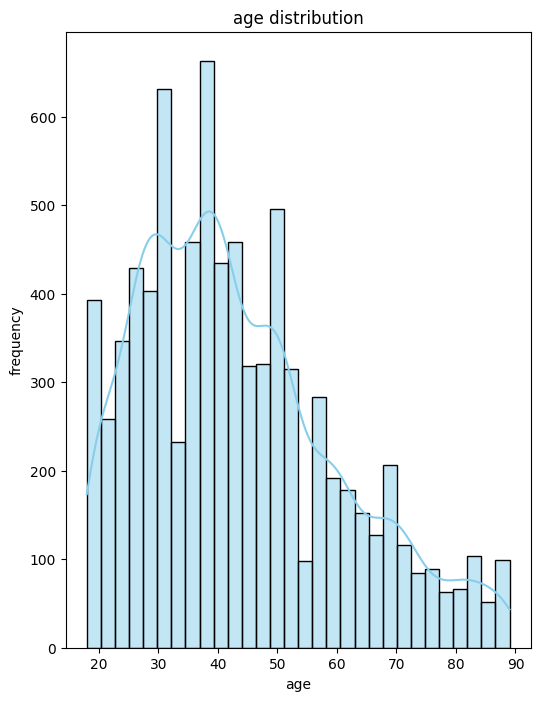

In [15]:
plt.figure(figsize=(6,8))
sns.histplot(data_train['Age'], bins=30, kde=True, color='skyblue')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

<Axes: >

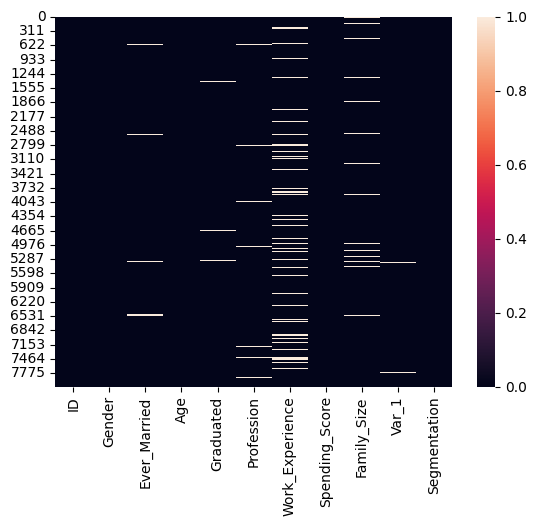

In [16]:
sns.heatmap(data_train.isnull())

In [17]:
categorical_columns = data_train.select_dtypes(include=['object', 'category']).columns
data_train = data_train.dropna(subset=categorical_columns)

numeric_columns = data_train.select_dtypes(include=['number']).columns
data_train[numeric_columns] = data_train[numeric_columns].fillna(data_train[numeric_columns].mean())

print(data_train.isnull().sum())


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [18]:
data_train = data_train.drop(columns=['ID'])

In [19]:
data_train.describe()

,Age,Work_Experience,Family_Size
count,7669.000000,7669.000000,7669.000000
mean,43.508541,2.636206,2.847343
std,16.689330,3.234815,1.498569
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,40.000000,1.000000,2.847343
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [20]:
import plotly.graph_objs as go
from plotly.offline import iplot

g1 = [go.Box(
    y=data_train.Work_Experience,
    name='Work_Experience',
    marker=dict(color='rgba(51, 0, 0, 0.9)'),
    hoverinfo='name+y'
)]

g2 = [go.Box(
    y=data_train.Family_Size,
    name='Family_Size',
    marker=dict(color='rgba(0, 102, 102, 0.9)'),
    hoverinfo='name+y'
)]

layout2 = go.Layout(
    title='Work Experience | Family Size',
    yaxis=dict(range=[0, 13])
)

fig2 = go.Figure(data=g1 + g2, layout=layout2)
iplot(fig2)


In [21]:
grafico = px.box(data_train, y='Age')
grafico.show()

In [22]:
fig2 = px.histogram(data_train, x='Age', color='Age', template='plotly_dark')
fig2.show()

In [23]:
fig2 = px.histogram(data_train, x='Gender', color='Gender',template='plotly_dark')
fig2.show()

In [24]:
fig2 = px.histogram(data_train, x='Ever_Married', color='Ever_Married',template='plotly_dark')
fig2.show()

In [25]:
fig2 = px.histogram(data_train, x='Graduated', color='Graduated', template='plotly_dark')
fig2.show()

In [26]:
fig2 = px.histogram(data_train,x='Profession', color='Profession', template='plotly_dark')
fig2.show()

In [27]:
fig2 = px.histogram(data_train, x='Work_Experience', color='Work_Experience', template='plotly_dark')
fig2.show()

In [28]:
fig2 = px.histogram(data_train, x='Spending_Score', color='Spending_Score', template='plotly_dark')
fig2.show()

In [29]:
fig2 = px.histogram(data_train, x='Family_Size', color='Family_Size', template='plotly_dark')
fig2.show()

In [30]:
fig2 = px.histogram(data_train, x='Var_1', color='Var_1', template='plotly_dark')
fig2.show()

In [31]:
mk = LabelEncoder()
data_train['Gender'] = mk.fit_transform(data_train['Gender'])
data_train['Ever_Married']= mk.fit_transform(data_train['Ever_Married'])
data_train['Graduated']= mk.fit_transform(data_train['Graduated'])
data_train['Spending_Score']= mk.fit_transform(data_train['Spending_Score'])
data_train['Var_1']= mk.fit_transform(data_train['Var_1'])
data_train['Profession']= mk.fit_transform(data_train['Profession'])
data_train['Family_Size']= mk.fit_transform(data_train['Family_Size'])
data_train['Work_Experience']= mk.fit_transform(data_train['Work_Experience'])
data_train['Segmentation']= mk.fit_transform(data_train['Segmentation'])


In [32]:
data_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,3,0,3,3,0
2,0,1,67,1,2,1,2,0,5,1
3,1,1,67,1,7,0,1,1,5,1
4,0,1,40,1,3,3,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0,1,5,5,1
8064,1,0,35,0,4,4,2,4,3,3
8065,0,0,33,1,5,1,2,0,5,3
8066,0,0,27,1,5,1,2,4,5,1


In [33]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_train)

In [34]:
type(data_scaler)

numpy.ndarray

In [35]:
min(data_scaler[0]), max(data_scaler[0])

(-1.2981618118077016, 1.2700839549557774)

In [36]:
wcss_1 = []
range_values = range(1,10)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_scaler)
  wcss_1.append(kmeans.inertia_)

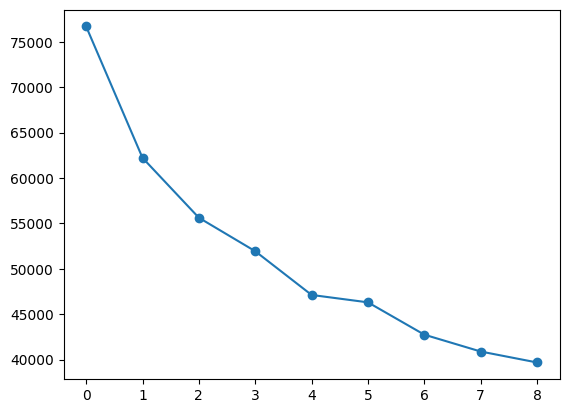

In [37]:
grafico = px.line(x=range(1,10), y=wcss_1)
plt.plot(wcss_1, '-o')
grafico.show()

In [38]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaler)

KMeans(n_clusters=5)

In [39]:
labels = kmeans.labels_
labels, len(labels)

(array([0, 1, 3, ..., 2, 2, 4], dtype=int32), 7669)

In [40]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data_train.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.023698,-1.073108,-0.981266,-0.795674,0.624139,-0.020878,0.735290,0.706913,-0.276168,0.927157
1,-1.105265,0.840986,0.247366,0.292737,-0.605081,-0.069372,-0.857318,0.045141,-0.086416,-0.147905
2,-0.342707,-0.965273,-0.308168,0.463133,-0.462709,0.428144,0.752916,-0.655834,0.099903,-0.608627
3,0.127609,0.754269,1.735696,-0.115525,1.310035,-0.401813,0.114930,-0.645538,0.359182,-0.198695
4,0.904760,0.840986,0.198834,0.245008,-0.421913,-0.080494,-0.747826,0.107422,0.073977,-0.208550


In [41]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[data_train.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,5.616658e-01,0.057128,27.132942,0.242926,4.353444,2.879338,1.985051,3.688735,3.766684,2.610785
1,-8.548717e-15,1.000000,47.636639,0.769114,1.237699,2.703255,0.634368,2.422407,4.035579,1.390613
2,3.793774e-01,0.110246,38.365759,0.851492,1.598573,4.509728,2.000000,1.081064,4.299611,0.867704
3,6.133625e-01,0.957284,72.474261,0.571742,6.092004,1.496166,1.458927,1.100767,4.667032,1.332968
4,1.000000e+00,1.000000,46.826733,0.746040,1.701980,2.662871,0.727228,2.541584,4.262871,1.321782


In [42]:
df_mk_cluster = pd.concat([data_train, pd.DataFrame({'cluster': labels})], axis=1)
df_mk_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,cluster
0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,3.0,3.0,0.0
1,0.0,1.0,38.0,1.0,2.0,3.0,0.0,3.0,3.0,0.0,1.0
2,0.0,1.0,67.0,1.0,2.0,1.0,2.0,0.0,5.0,1.0,3.0
3,1.0,1.0,67.0,1.0,7.0,0.0,1.0,1.0,5.0,1.0,3.0
4,0.0,1.0,40.0,1.0,3.0,3.0,1.0,6.0,5.0,0.0,1.0


In [43]:
!!sudo apt-get install fonts-ubuntu

['',
 'Reading package lists... 0%',
 '',
 'Reading package lists... 0%',
 '',
 'Reading package lists... 0%',
 '',
 'Reading package lists... 3%',
 '',
 'Reading package lists... 3%',
 '',
 'Reading package lists... 4%',
 '',
 'Reading package lists... 4%',
 '',
 'Reading package lists... 35%',
 '',
 'Reading package lists... 39%',
 '',
 'Reading package lists... 39%',
 '',
 'Reading package lists... 40%',
 '',
 'Reading package lists... 40%',
 '',
 'Reading package lists... 47%',
 '',
 'Reading package lists... 47%',
 '',
 'Reading package lists... 55%',
 '',
 'Reading package lists... 55%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 59%',
 '',
 'Reading package lists... 65%',
 '',
 'Reading package lists... 65%',
 '',
 'Reading pack

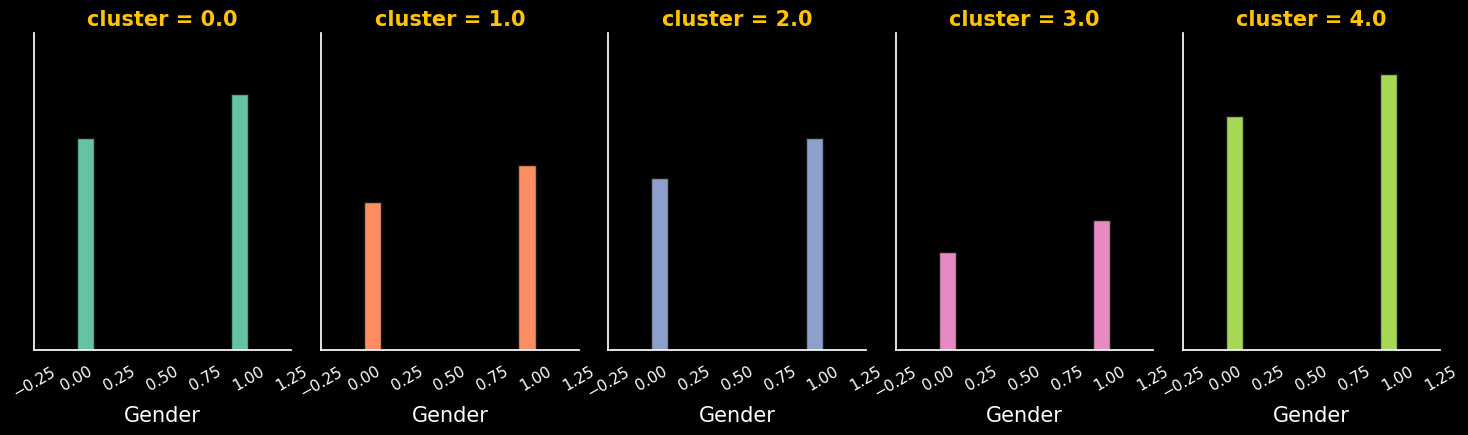

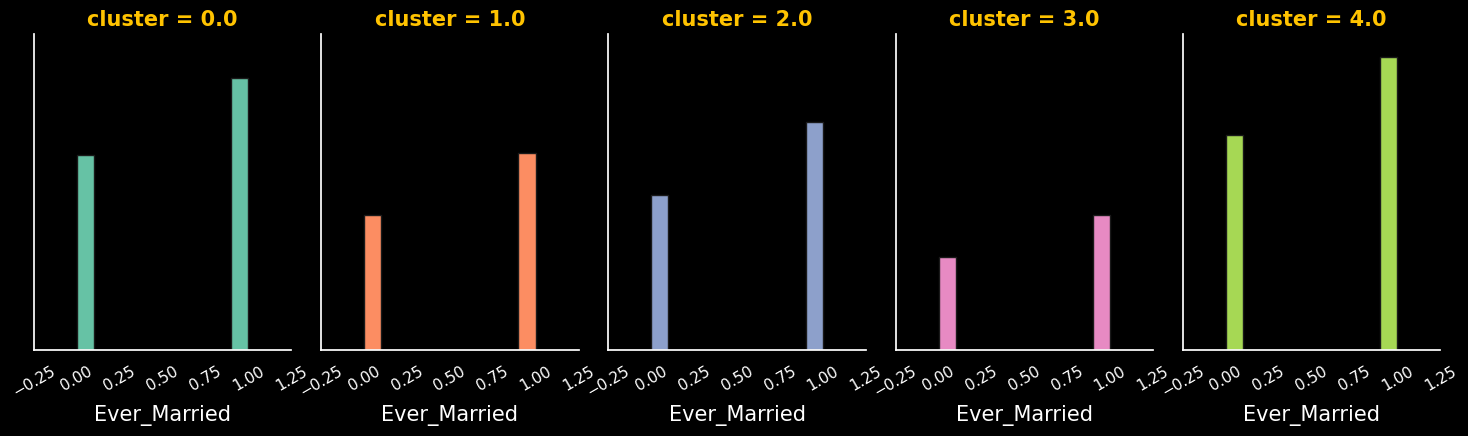

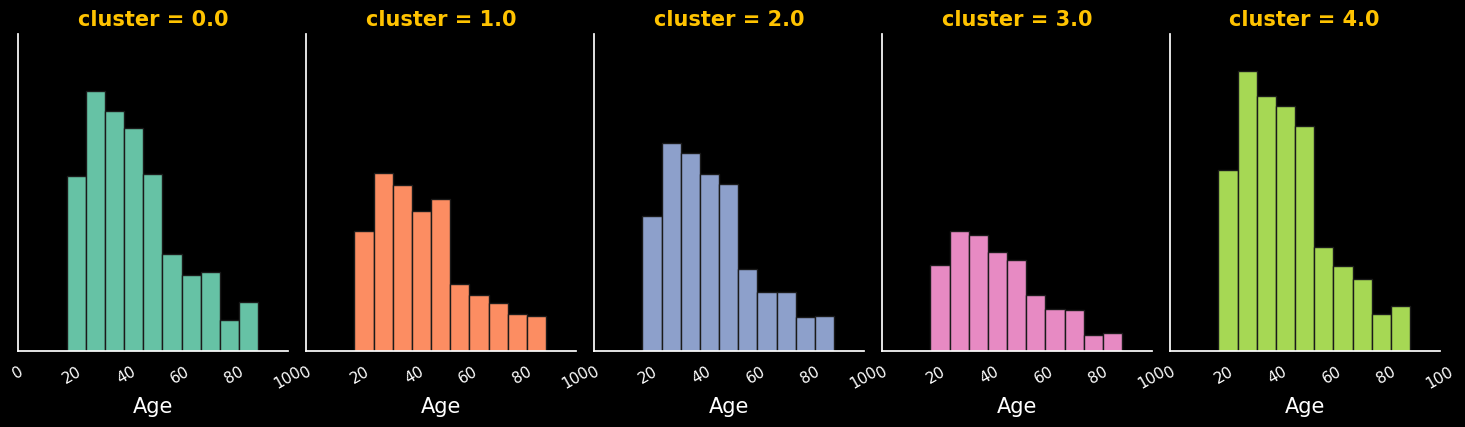

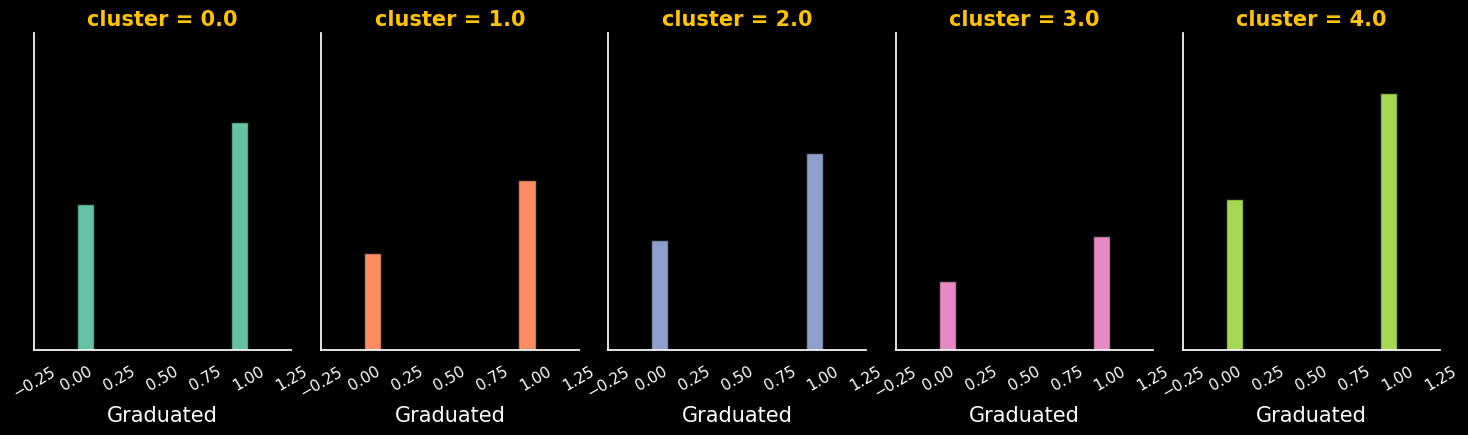

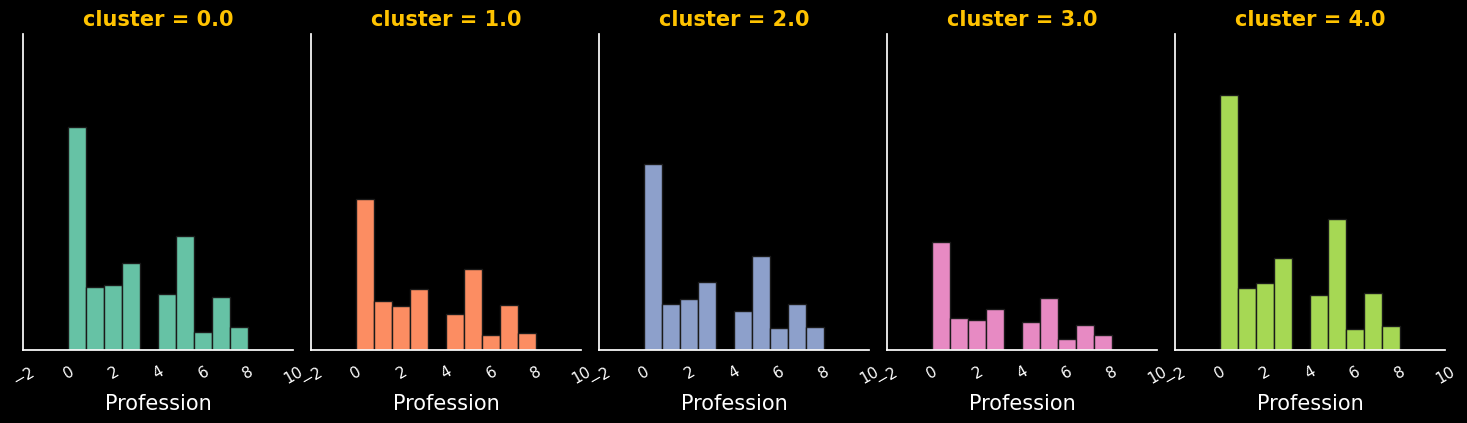

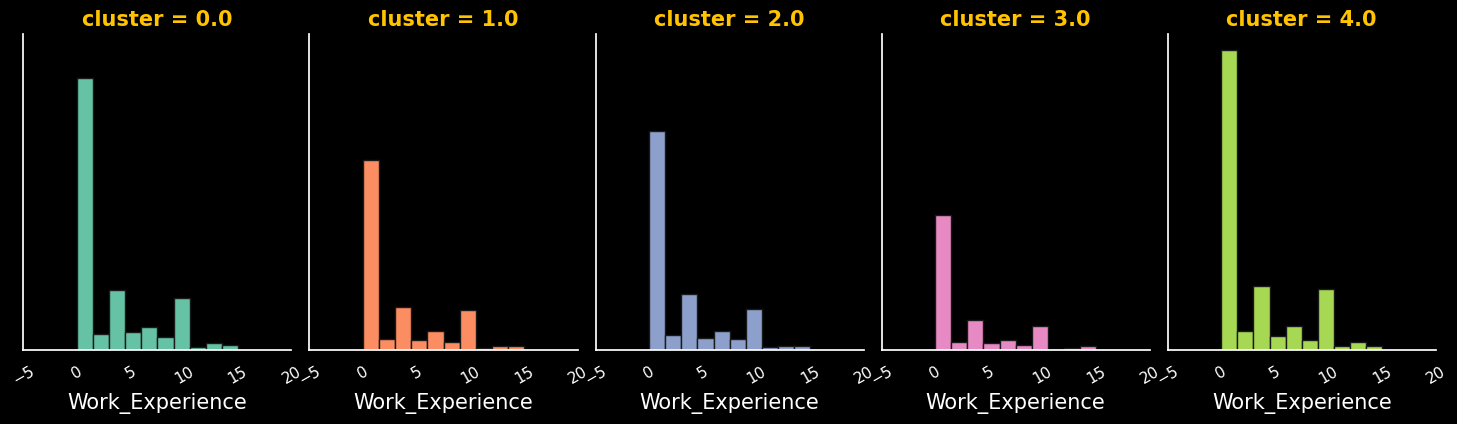

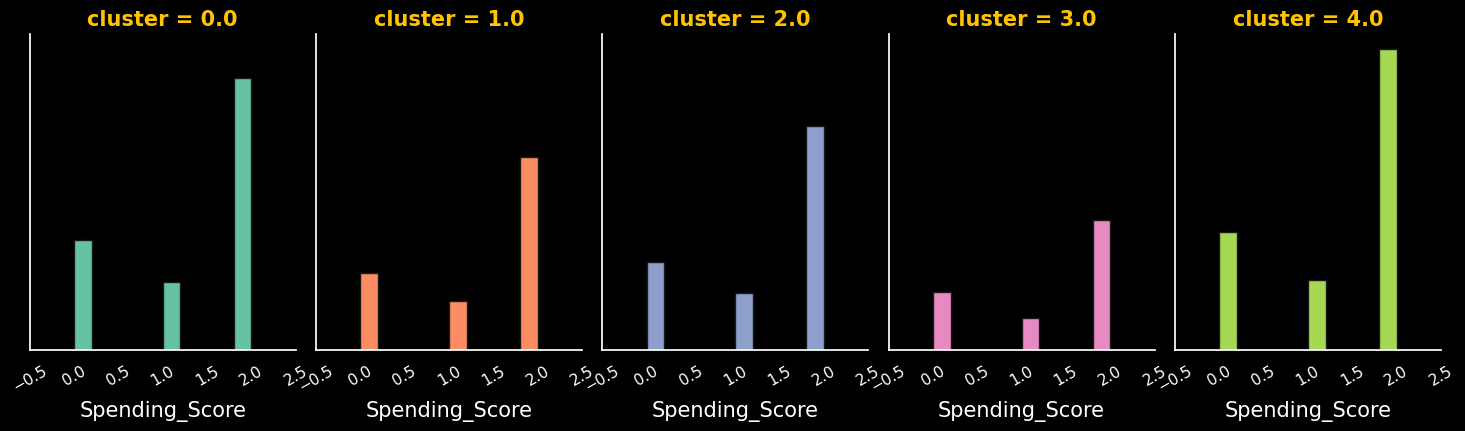

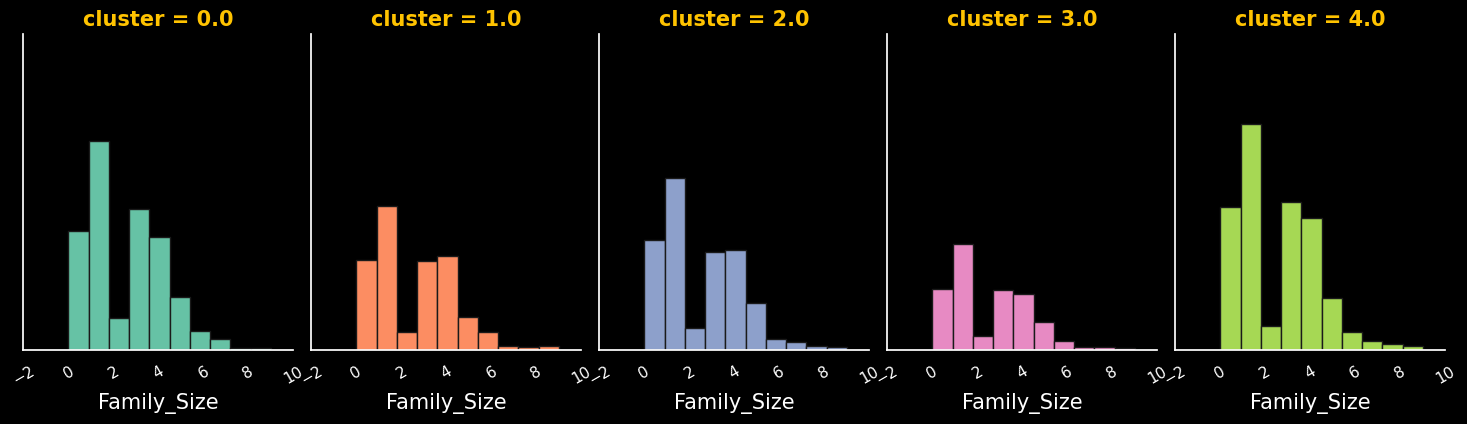

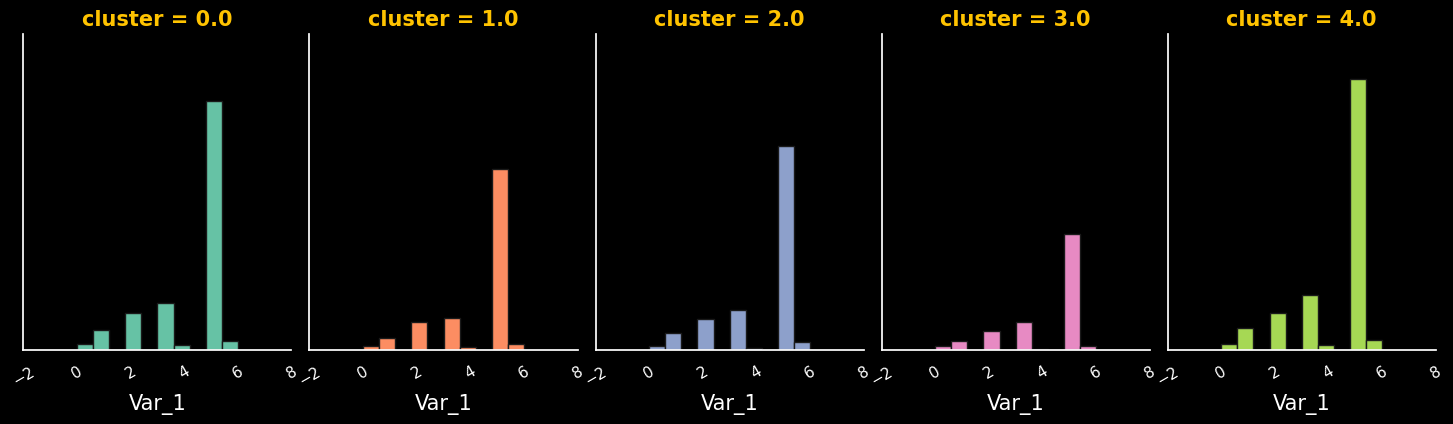

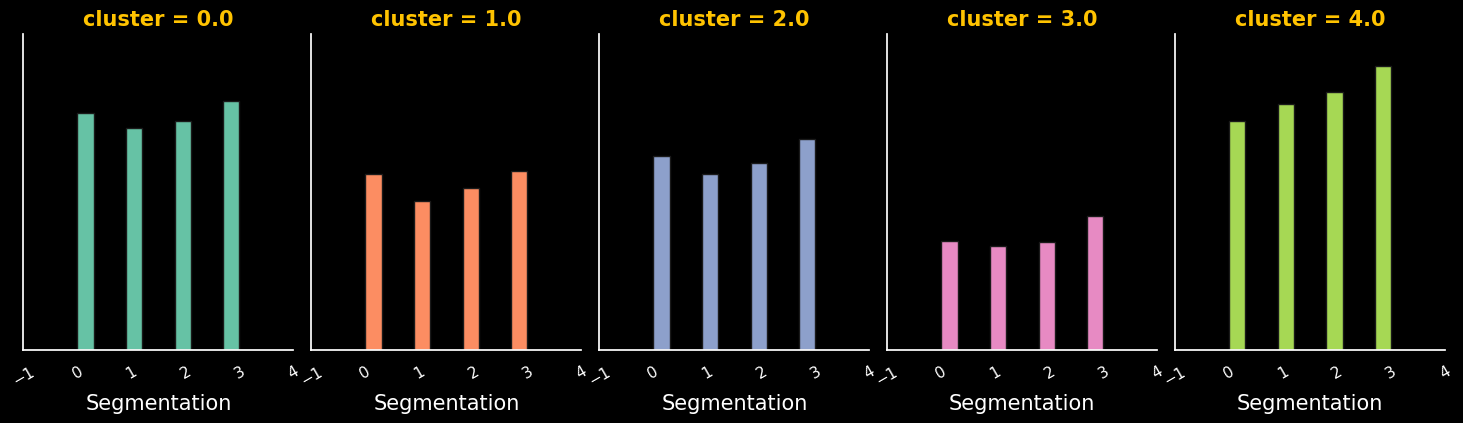

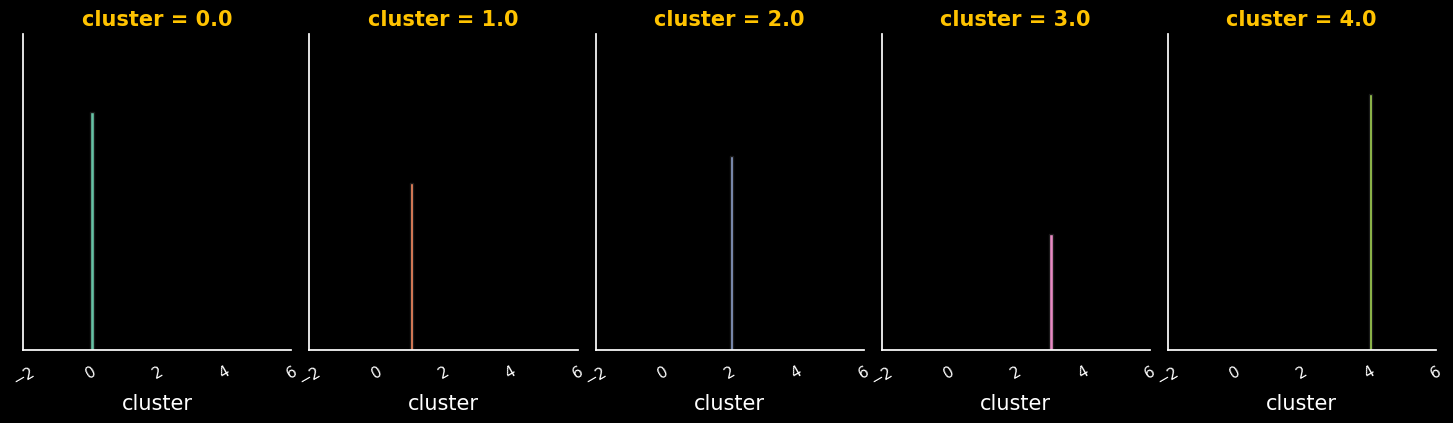

In [44]:
sns.set(rc={'axes.facecolor': 'black','figure.facecolor': 'black', 'axes.grid': False, 'font.family': 'sans-serif'})

for i in df_mk_cluster:
  g= sns.FacetGrid(df_mk_cluster, col='cluster', hue='cluster', palette='Set2')
  g.map(plt.hist, i, bins=10, ec='k')
  g.set_xticklabels(rotation=30, color='white')
  g.set_yticklabels(color='white')
  g.set_xlabels(size=15, color='white')
  g.set_titles(size=15, color='#FFC300', fontweight='bold')
  g.fig.set_figheight(5);

In [45]:
import matplotlib as mpl

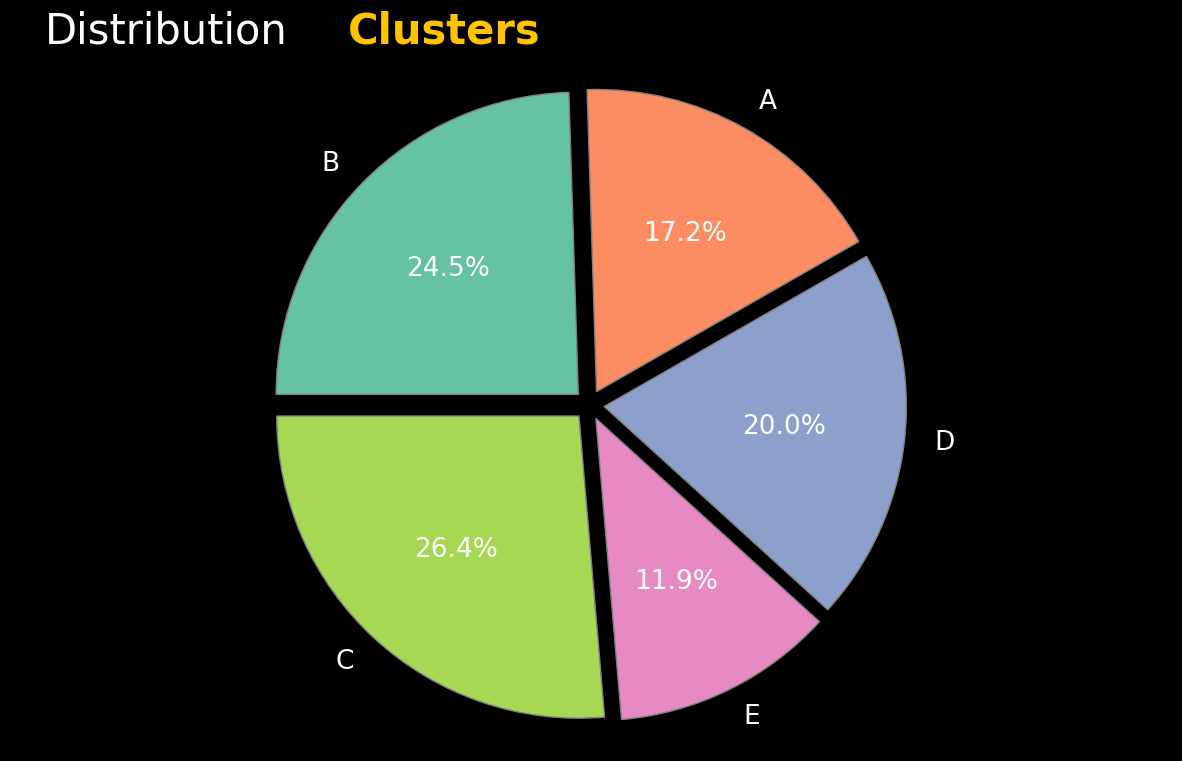

In [46]:
clusters_count = df_mk_cluster['cluster'].value_counts()
clusters_count = clusters_count.to_frame().reset_index()
clusters_count.columns = ['clusters', 'count']
clusters_count = clusters_count.sort_values('clusters', ascending = True)

labels = [
        "B",
        "A",
        "D",
        "E",
        "C"
        ]

plt.figure(figsize=(15,9))
mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'],
        explode=(0.05, 0.05, 0.05, 0.05, 0.05),
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [47]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0, 0.5, 'Y')

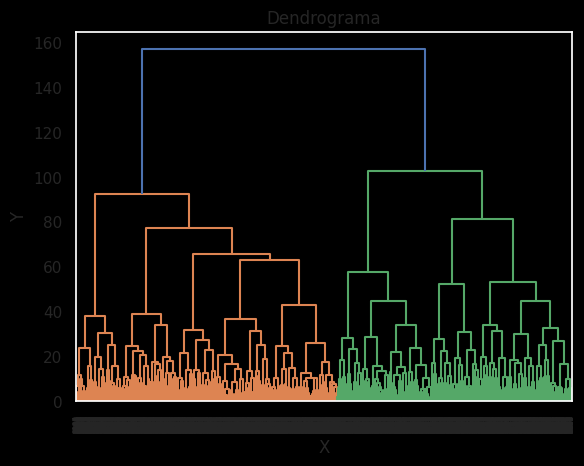

In [48]:
dendrogram = dendrogram(linkage(data_scaler, method='ward'))
plt.title('Dendrograma')
plt.xlabel('X')
plt.ylabel('Y')

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

hc_g = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
rotulos = hc_g.fit_predict(data_scaler)


In [53]:
rotulos

array([2, 0, 0, ..., 1, 1, 0])

In [54]:
grafico = px.scatter(x= data_scaler[:,0], y= data_scaler[:,1], color=rotulos)
grafico.show()

In [55]:
data_scaler

array([[ 0.90476042, -1.18908053, -1.28884403, ...,  0.86957817,
        -0.817195  ,  1.27008395],
       [-1.10526497,  0.84098594, -0.33008515, ...,  0.34698629,
        -0.817195  , -1.37313826],
       [-1.10526497,  0.84098594,  1.40766531, ..., -1.22078935,
         0.59414797, -0.49206419],
       ...,
       [-1.10526497, -1.18908053, -0.6296973 , ..., -1.22078935,
         0.59414797,  1.27008395],
       [-1.10526497, -1.18908053, -0.98923188, ...,  0.86957817,
         0.59414797, -0.49206419],
       [ 0.90476042,  0.84098594, -0.39000758, ...,  0.34698629,
        -0.817195  , -0.49206419]])

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
dbscan_g = DBSCAN(eps=0.95, min_samples=2)
dbscan_g.fit(data_train)

DBSCAN(eps=0.95, min_samples=2)

In [58]:
rotulos = dbscan_g.labels_
rotulos

array([  0,  -1,  -1, ..., 169,  -1,  -1])

In [59]:
grafico = px.scatter(x=data_scaler[:,0], y=data_scaler[:,1], color=rotulos)
grafico.show()